In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.math import confusion_matrix
from tensorflow import keras
from keras.datasets import mnist

In [32]:
(X_train, Y_train) , (X_test, Y_test) = mnist.load_data()

In [33]:
print(f"{X_train.shape} , {Y_train.shape} , {X_test.shape} , {Y_test.shape}")

(60000, 28, 28) , (60000,) , (10000, 28, 28) , (10000,)


In [34]:
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [35]:
print(X_train[4].shape)

(28, 28)


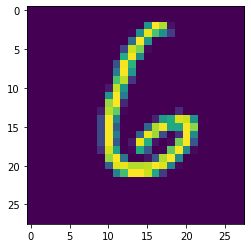

In [36]:
plt.imshow(X_train[32])
plt.show()

In [37]:
print(Y_train[32])

6


In [38]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [39]:
X_train = X_train / 255
X_test = X_test / 255

In [40]:
print(X_train[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - accuracy: 0.8505 - loss: 0.5377
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.9518 - loss: 0.1718
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.9643 - loss: 0.1251
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.9713 - loss: 0.0970
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.9760 - loss: 0.0800
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.9801 - loss: 0.0666
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.9828 - loss: 0.0568
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9849 - loss: 0.0513
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - accuracy: 0.9861 - loss: 0.0446
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9882 - loss: 0.0384


In [43]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9703 - loss: 0.0967


[0.08427011221647263, 0.974399983882904]

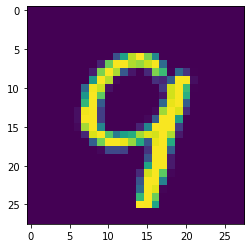

In [44]:
plt.imshow(X_test[16])
plt.show()

In [45]:
print(Y_test[16])

9


In [46]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step


In [47]:
print(Y_pred[16])

[3.5110926e-03 4.8491842e-07 2.3313995e-02 1.8097871e-03 4.6264667e-02
 4.7612057e-06 9.5681498e-06 5.2091175e-01 2.3110798e-03 9.9981552e-01]


In [48]:
print(np.argmax(Y_pred[0]))

7


In [49]:
Y_pred_vals = [np.argmax(i) for i in Y_pred]
print(Y_pred_vals)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [50]:
confusion_matrix = confusion_matrix(Y_test, Y_pred_vals)
print(confusion_matrix)

tf.Tensor(
[[ 963    0    1    1    0    3    5    1    4    2]
 [   0 1125    1    1    0    1    3    1    3    0]
 [   5    4 1007    3    1    0    3    3    6    0]
 [   0    0    6  980    0   12    1    2    5    4]
 [   1    3    3    0  949    0    6    4    1   15]
 [   1    1    0    8    3  870    0    0    8    1]
 [   3    3    4    1    1    8  936    0    2    0]
 [   1    5   15    4    0    0    0  992    4    7]
 [   2    0    5    5    4    4    1    3  947    3]
 [   1    5    0    5    7    3    1    7    5  975]], shape=(10, 10), dtype=int32)


Text(0.5, 87.0000000000001, 'Predicted values')

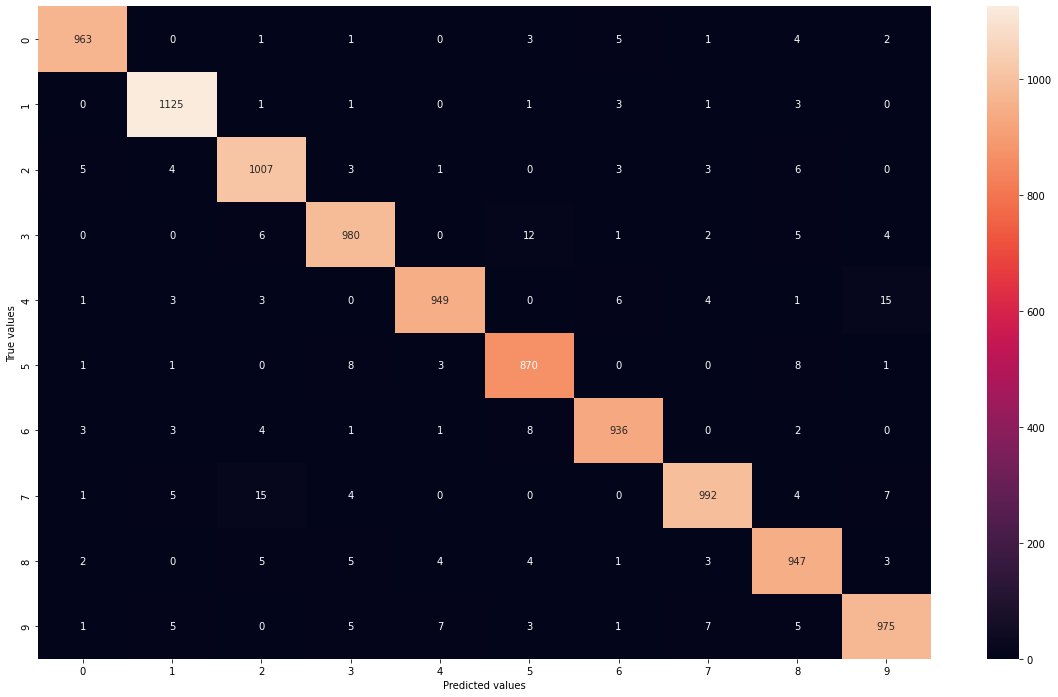

In [51]:
plt.figure(figsize=(20,12))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.ylabel('True values')
plt.xlabel('Predicted values')

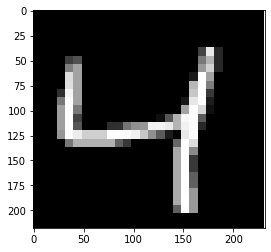

In [52]:
image = cv2.imread("img/four.png")
plt.imshow(image)
plt.show()

In [53]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
resized_image = cv2.resize(gray_image, (28, 28))
normalized_image = resized_image / 255.0
reshaped_image = np.reshape(normalized_image, [1, 28, 28])
prediction = model.predict(reshaped_image)
predicted_digit = np.argmax(prediction)

print('This is', predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
This is 4
